#Customer Segmentation using K-Means Clustering

**Internship Task 8 – Unsupervised Learning**

##Objective

To perform customer segmentation using **K-Means clustering** on the Mall Customer dataset in order to identify meaningful customer groups and gain actionable business insights.

##Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score

##Load Dataset

In [2]:
df = pd.read_csv("Mall Customers dataset.csv")
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


##Basic Exploration

In [3]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


##Select Features

In [4]:
X = df[['Annual Income (k$)', 'Spending Score (1-100)']]

##Feature Scaling

In [5]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

#ELBOW METHOD — Optimal K

##Elbow Plot

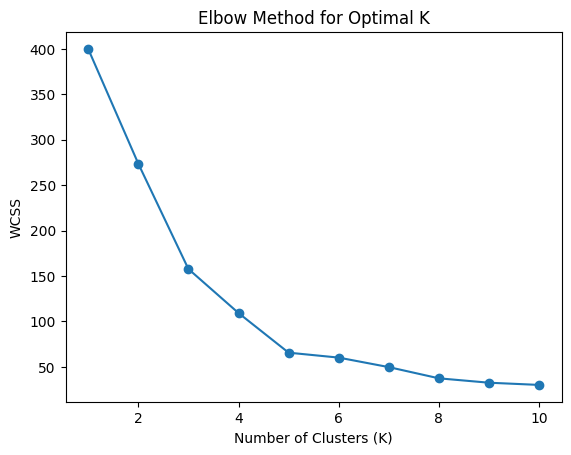

In [6]:
wcss = []

for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

plt.figure()
plt.plot(range(1,11), wcss, marker='o')
plt.xlabel("Number of Clusters (K)")
plt.ylabel("WCSS")
plt.title("Elbow Method for Optimal K")
plt.show()

#K-MEANS MODEL TRAINING

##Train Model

In [7]:
kmeans = KMeans(n_clusters=5, random_state=42)
clusters = kmeans.fit_predict(X_scaled)

df['Cluster'] = clusters
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,1,Male,19,15,39,4
1,2,Male,21,15,81,2
2,3,Female,20,16,6,4
3,4,Female,23,16,77,2
4,5,Female,31,17,40,4


#CLUSTER VISUALIZATION

##Visualize Clusters

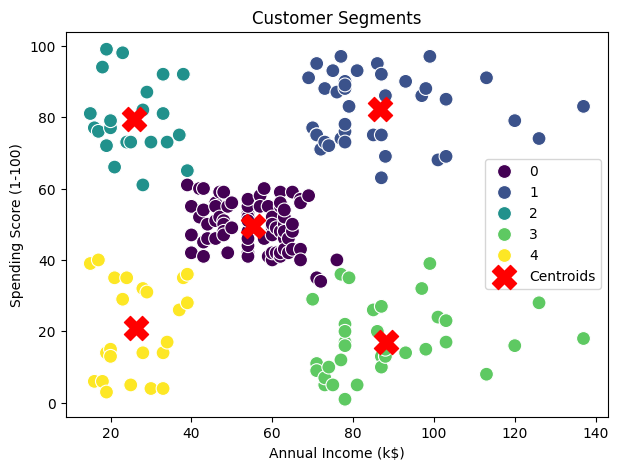

In [8]:
plt.figure(figsize=(7,5))
sns.scatterplot(
    x=df['Annual Income (k$)'],
    y=df['Spending Score (1-100)'],
    hue=df['Cluster'],
    palette='viridis',
    s=100
)

plt.scatter(
    kmeans.cluster_centers_[:,0] * scaler.scale_[0] + scaler.mean_[0],
    kmeans.cluster_centers_[:,1] * scaler.scale_[1] + scaler.mean_[1],
    c='red', s=300, marker='X', label='Centroids'
)

plt.title("Customer Segments")
plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score (1-100)")
plt.legend()
plt.show()

#PCA VISUALIZATION

##PCA Plot

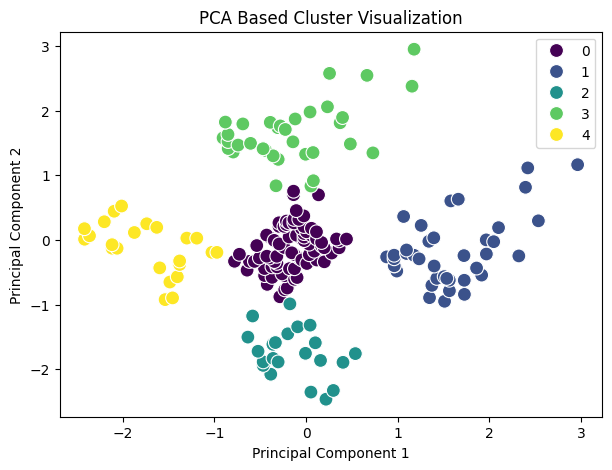

In [9]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(7,5))
sns.scatterplot(x=X_pca[:,0], y=X_pca[:,1], hue=clusters, palette='viridis', s=100)
plt.title("PCA Based Cluster Visualization")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.show()

#SILHOUETTE SCORE — CLUSTER QUALITY

##Silhouette Score

In [10]:
score = silhouette_score(X_scaled, clusters)
print("Silhouette Score:", score)

Silhouette Score: 0.5546571631111091


#BUSINESS INSIGHTS

##Business Insights

Based on clustering, customers can be segmented into:

- High Income – High Spending (Premium Customers)
- High Income – Low Spending (Careful Customers)
- Low Income – High Spending (Potential Target Group)
- Low Income – Low Spending (Budget Customers)
- Average Income – Average Spending (Regular Customers)

These insights help in targeted marketing and customer strategy planning.

##Conclusion

This project successfully demonstrates customer segmentation using K-Means clustering, enabling effective identification of customer groups through optimal clustering, visualization, and performance evaluation.